In [53]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import pandas as pd
import random
import os

In [54]:
#ไฟล์ excel ที่เราต้องการจะดึงข้อมูลมาทำ point
dataframe = pd.read_excel("D:/pptxmaker/สมุดงาน1.xlsx")

#สุ่ม template
temp = os.listdir("D:/pptxmaker/template")
rantemp = random.choice(temp)
prs = Presentation("D:/pptxmaker/template/"+str(rantemp))
print("template name:"+str(rantemp))

#หรือเลือกไฟล์ power point ที่เราโหลดเทมเพลตมา ถ้าเป็นจะสร้างเป็น point ใหม่ไม่มีเทมเพลตไรเลยก็เว้น () เปล่าๆไว้
#prs = Presentation("D:/pptxmaker/Online-Doctor-Medical-PowerPoint-Templates.pptx")

prs.save("D:/pptxmaker/mypoint.pptx")
#ตอนนี้ template ที่ถูกสุ่มมาถูกเซฟไว้แล้ว ใช้ดูธีมเพื่อประกอบการตัดสินใจ เช่น เลือกสีตัวอักษร

template name:2019-Medical-Plan-PowerPoint-Templates.pptx


In [55]:
#เอาเค้าโครงสไลด์แบบไหน [ใส่หมายเลข]
slide_layout = prs.slide_layouts[0]

In [56]:
def iconinsert(kw,folder):
    if kw in tf.text:
        files = os.listdir(folder)
        ran = random.choice(files)
        genre = str(folder).replace("D:/pptxmaker/icon/","")
        path = str(os.path.abspath(ran)).replace("C:\\Users\\DELL NB\\",str("D:/pptxmaker/icon/"+ genre +"/"))
        left = top = Inches(1)
        height = Inches(2)
        icon = slide.shapes.add_picture(path,left,top,height)
        
#ตรงนี้คือการสุ่มภาพไปตกแต่งพ้อยตามคีย์เวิร์ด ซึ่งเราจะต้องสร้างโฟลเดอร์ในเครื่องเราสำหรับใส่รูปที่เราอยากใส่
#อย่างเช่น อันแรกคือถ้ามี keyword คำว่า "ทารก" ให้ใส่ภาพทารกซึ่งอยู่ในโฟลเดอร์ D:/pptxmaker/icon/baby
def icondict():
    #iconinsert("","D:/pptxmaker/icon/")
    iconinsert("ทารก","D:/pptxmaker/icon/baby")
    iconinsert("เลือด","D:/pptxmaker/icon/blood")
    iconinsert("กระดูก","D:/pptxmaker/icon/bone")
    iconinsert("สมอง","D:/pptxmaker/icon/brain")
    iconinsert("เด็ก","D:/pptxmaker/icon/children")
    iconinsert("ค่ารักษา","D:/pptxmaker/icon/cost")
    iconinsert("แพทย์","D:/pptxmaker/icon/doctor")
    iconinsert("ฉุกเฉิน","D:/pptxmaker/icon/emergency")
    iconinsert("ออกกำลัง","D:/pptxmaker/icon/exercise")
    iconinsert("ตา","D:/pptxmaker/icon/eye")
    iconinsert("หญิง","D:/pptxmaker/icon/female")
    iconinsert("ไข้","D:/pptxmaker/icon/fever")
    iconinsert("อาหาร","D:/pptxmaker/icon/food")
    iconinsert("พันธุกรรม","D:/pptxmaker/icon/genetic")
    iconinsert("ศีรษะ","D:/pptxmaker/icon/head")
    iconinsert("หัวใจ","D:/pptxmaker/icon/heart")
    iconinsert("ซักประวัติ","D:/pptxmaker/icon/history")
    iconinsert("เชื้อ","D:/pptxmaker/icon/infection")
    iconinsert("ฉีด","D:/pptxmaker/icon/injection")
    iconinsert("ลำไส้","D:/pptxmaker/icon/intestine")
    iconinsert("ห้องปฏิบัติการ","D:/pptxmaker/icon/investigation")
    iconinsert("ไต","D:/pptxmaker/icon/infection/kidney")
    iconinsert("ตับ","D:/pptxmaker/icon/liver")
    iconinsert("ปอด","D:/pptxmaker/icon/lung")
    iconinsert("ชาย","D:/pptxmaker/icon/male")
    iconinsert("การแพทย์","D:/pptxmaker/icon/medical")
    iconinsert("ยา","D:/pptxmaker/icon/medicine")
    iconinsert("จิต","D:/pptxmaker/icon/mind")
    iconinsert("ชีวโมเลกุล","D:/pptxmaker/icon/molecular")
    iconinsert("อ้วน","D:/pptxmaker/icon/obese")
    iconinsert("สูงอายุ","D:/pptxmaker/icon/old")
    iconinsert("ผู้ป่วย","D:/pptxmaker/icon/patient")
    iconinsert("ตั้งครรภ์","D:/pptxmaker/icon/pregnant")
    iconinsert("รังสี","D:/pptxmaker/icon/radiology")
    iconinsert("สืบพันธุ์","D:/pptxmaker/icon/reproductive")
    iconinsert("สถิติ","D:/pptxmaker/icon/statistic")
    iconinsert("กระเพาะ","D:/pptxmaker/icon/stomach")
    iconinsert("ฟัน","D:/pptxmaker/icon/teeth")
    iconinsert("เวลา","D:/pptxmaker/icon/time")
    iconinsert("รักษา","D:/pptxmaker/icon/treatment")
    

In [57]:
for row in dataframe["content"]:
    slide = prs.slides.add_slide(slide_layout)
    shapes = slide.shapes
    
    left = top = Inches(1)
    width = Inches(8) 
    height = Inches(6)
    txBox = slide.shapes.add_textbox(left,top,width,height)
    tf = txBox.text_frame
    tf.alignment = PP_ALIGN.LEFT
    
    p = tf.paragraphs[0]
    run = p.add_run()
    run.text = row
    font = run.font
    #ตรงนี้เราสามารถปรับฟ้อนต์, ขนาด, สี ของตัวหนังสือที่เราจะให้มันใส่ในพ้อยได้ (มีตารางสีคร่าวๆ ด้านล่าง)
    font.name = "JasmineUPC"
    font.size = Pt(40)
    font.color.rgb = RGBColor(0,255,222)
    
    icondict()
    
#เราจะเซฟไฟล์นี้ที่ไหนและตั้งชื่อมันว่าอะไร    
prs.save("D:/pptxmaker/mypoint.pptx")

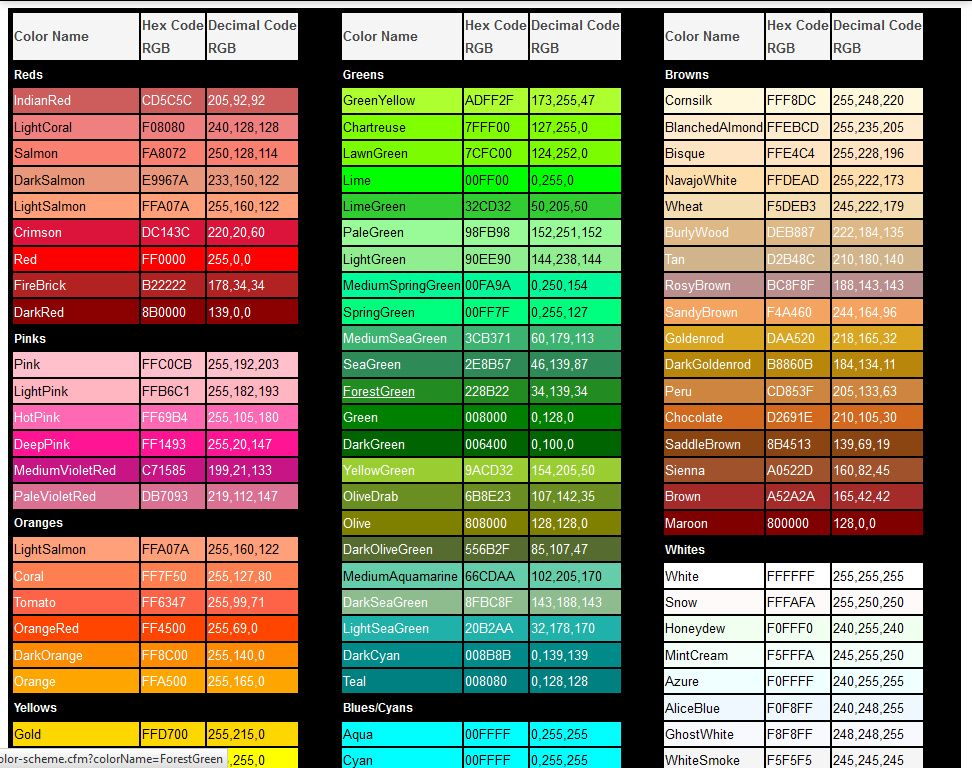